In [7]:
%pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, KFold

In [9]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [10]:
train_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [11]:
train_data.drop("Unnamed: 0", axis = 1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43040 non-null  float64
 1   cut      43040 non-null  object 
 2   color    43040 non-null  object 
 3   clarity  43040 non-null  object 
 4   depth    43040 non-null  float64
 5   table    43040 non-null  float64
 6   price    43040 non-null  int64  
 7   x        43040 non-null  float64
 8   y        43040 non-null  float64
 9   z        43040 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [12]:
train_data["cut"].value_counts()

Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: cut, dtype: int64

In [13]:
train_data["color"].value_counts()

G    9080
E    7723
F    7527
H    6640
D    5555
I    4297
J    2218
Name: color, dtype: int64

In [14]:
train_data["clarity"].value_counts()

SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64

In [15]:
train_data.describe()

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [16]:
(train_data == 0).sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           7
y           6
z          17
dtype: int64

In [17]:
#train data without zeros - dropping dimensionless features
train_data = train_data.drop(train_data[train_data['x']==0].index)
train_data = train_data.drop(train_data[train_data['y']==0].index)
train_data = train_data.drop(train_data[train_data['z']==0].index)

In [18]:
(train_data == 0).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f569f00f290>,
      dtype=object)

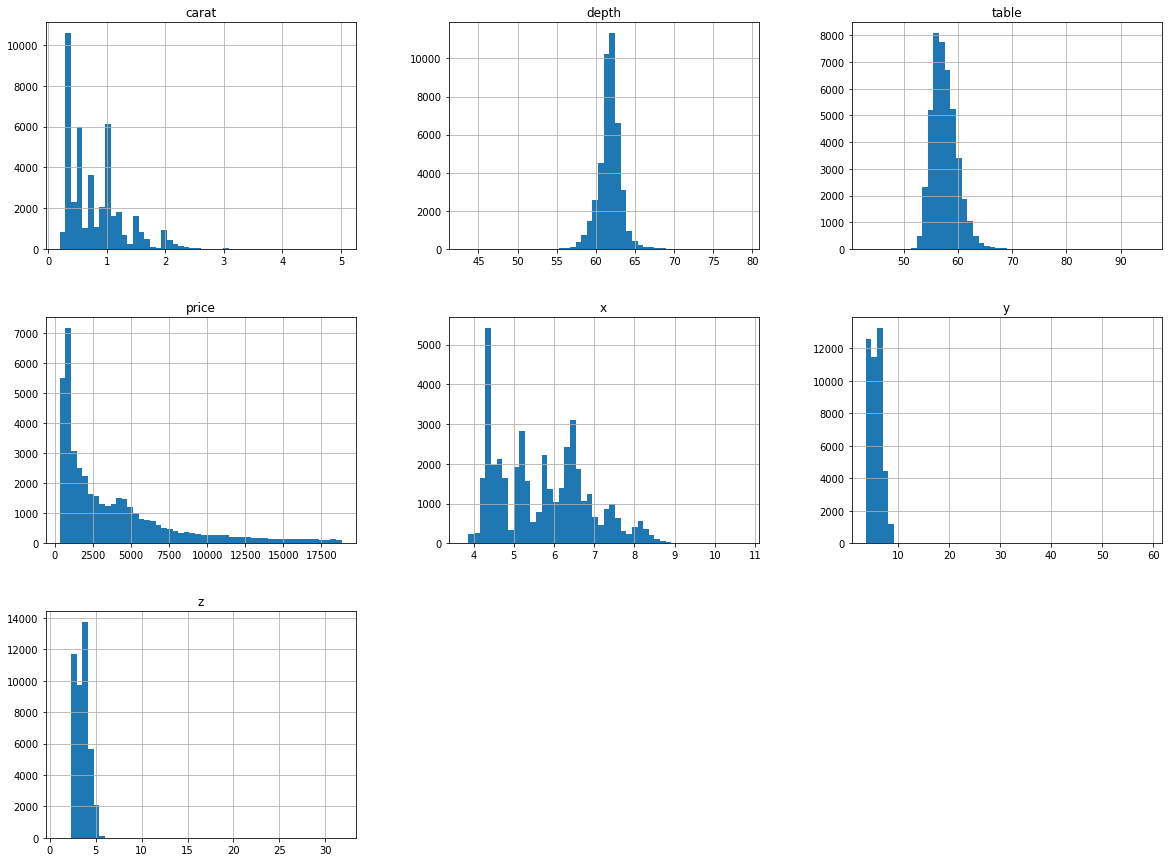

In [19]:
train_data.hist(bins=50, figsize=(20, 15))

In [20]:
data_corr = train_data.corr()
data_corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.022620,0.191308,0.923758,0.977258,0.948365,0.956847
depth,0.022620,1.000000,-0.291962,-0.014500,-0.030813,-0.034666,0.088410
table,0.191308,-0.291962,1.000000,0.137147,0.205577,0.192247,0.161531
price,0.923758,-0.014500,0.137147,1.000000,0.890222,0.866044,0.867918
x,0.977258,-0.030813,0.205577,0.890222,1.000000,0.969801,0.971837
y,0.948365,-0.034666,0.192247,0.866044,0.969801,1.000000,0.949230
z,0.956847,0.088410,0.161531,0.867918,0.971837,0.949230,1.000000


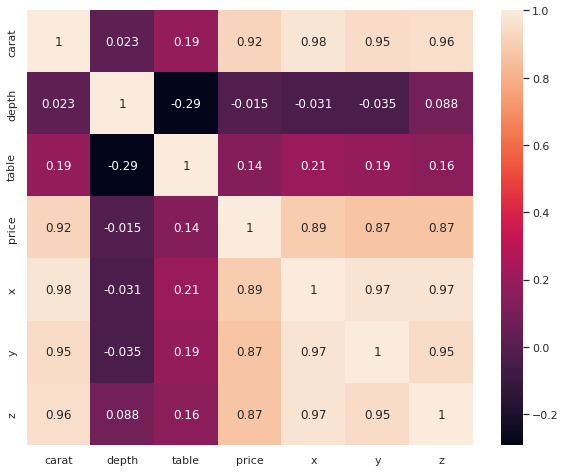

In [21]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(data_corr, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f569baaf4d0>,
      dtype=object)

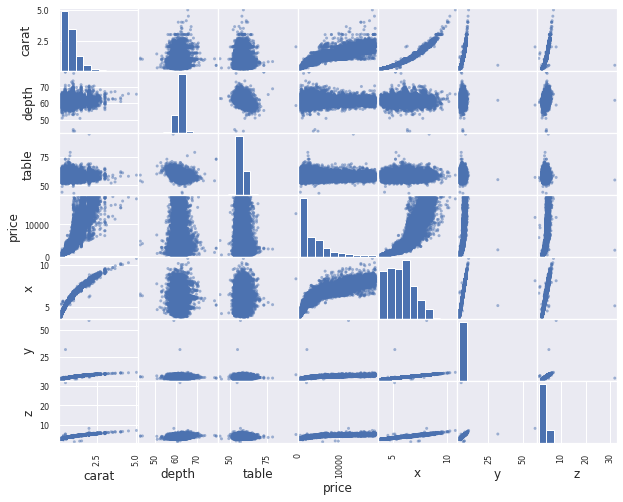

In [22]:
from pandas.plotting import scatter_matrix
num_data = train_data.drop(["cut", "color", "clarity"], axis=1)
scatter_matrix(num_data)

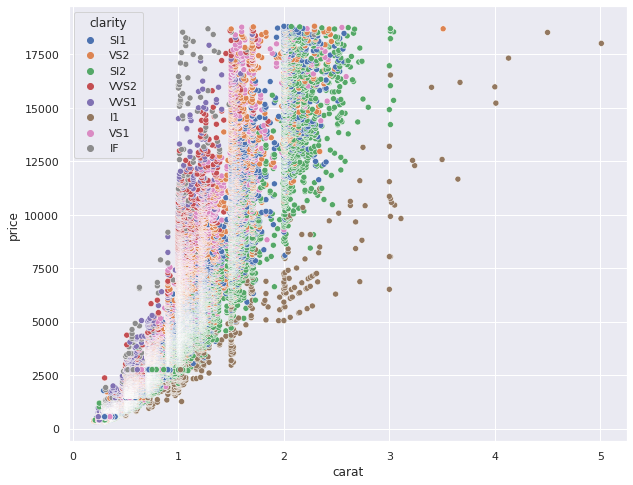

In [23]:
sns.scatterplot(data=train_data, x="carat", y="price", hue = "clarity")

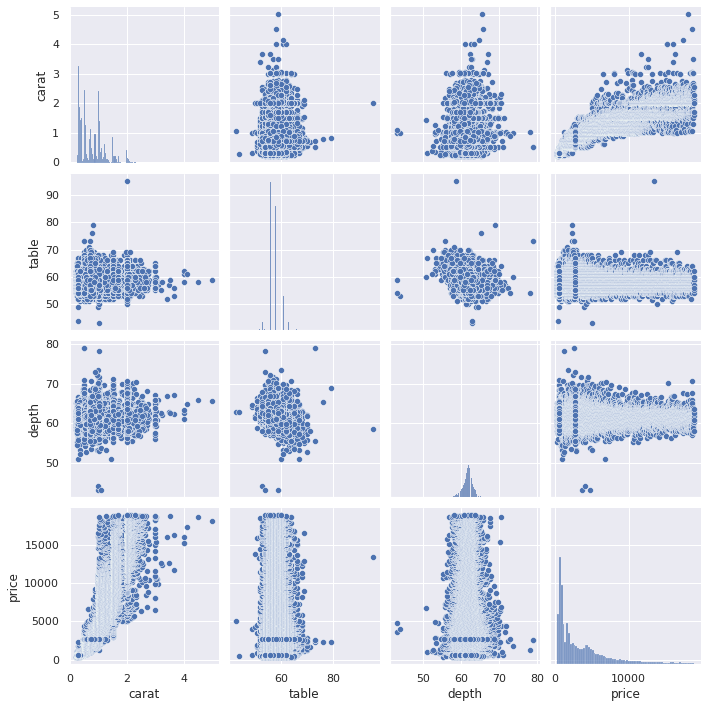

In [24]:
attributes = ["carat", "table", "depth", "price"]
sns.pairplot(data=train_data[attributes])

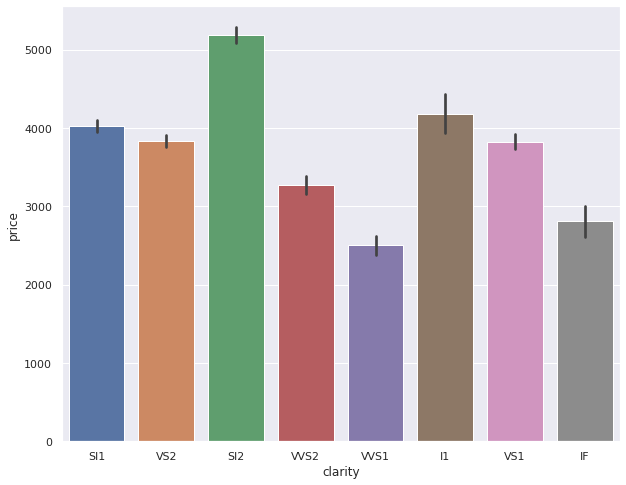

In [25]:
sns.barplot(data=train_data, x="clarity", y="price")

**Dealing With** **Outliers**

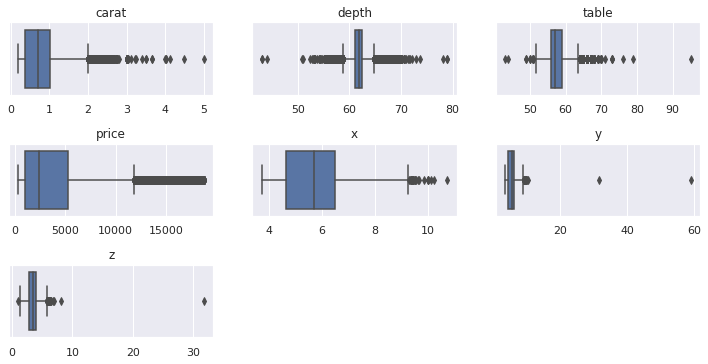

In [26]:
#outliars detection for train data
df_count = train_data.select_dtypes([int, float])
outliers_columns = []
fig = plt.figure(figsize=(10, 10))
for index, column in enumerate(df_count.columns, 1):
  ax = plt.subplot(6, 3, index)
  sns.boxplot(data = df_count, x=df_count[column])
  ax.set_xlabel(None)
  ax.set_title(f'{column}')
  outliers_columns.append(column)
  plt.tight_layout(w_pad=3)
plt.show()

In [27]:
outliers_columns

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [28]:
def get_out(data, co):
  KNN_model = KNN(co)
  KNN_model.fit(data)
  labels = KNN_model.labels_
  outliars = data.iloc[labels == 1]
  return outliars.index

In [29]:
train_diamonds = train_data.copy()

In [30]:
#Detecting Outliers

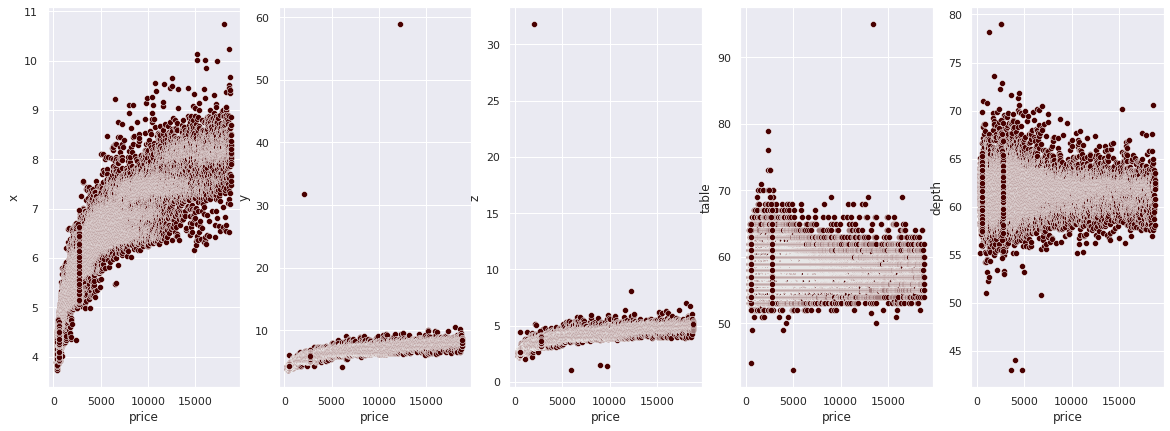

In [31]:
sns.set_palette("afmhot")
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = train_diamonds, x = train_diamonds['price'], y = train_diamonds[i], ax = axs[c])
    c+=1

In [32]:
train_data = train_data[(train_data['x'] < 30)]
train_data = train_data[(train_data['y'] < 30)]
train_data = train_data[(train_data['z'] < 30) & (train_data['z'] > 2)]
train_data = train_data[(train_data['table'] < 80) & (train_data['table'] > 40)]
train_data = train_data[(train_data['depth'] < 75) & (train_data['depth'] > 45)]

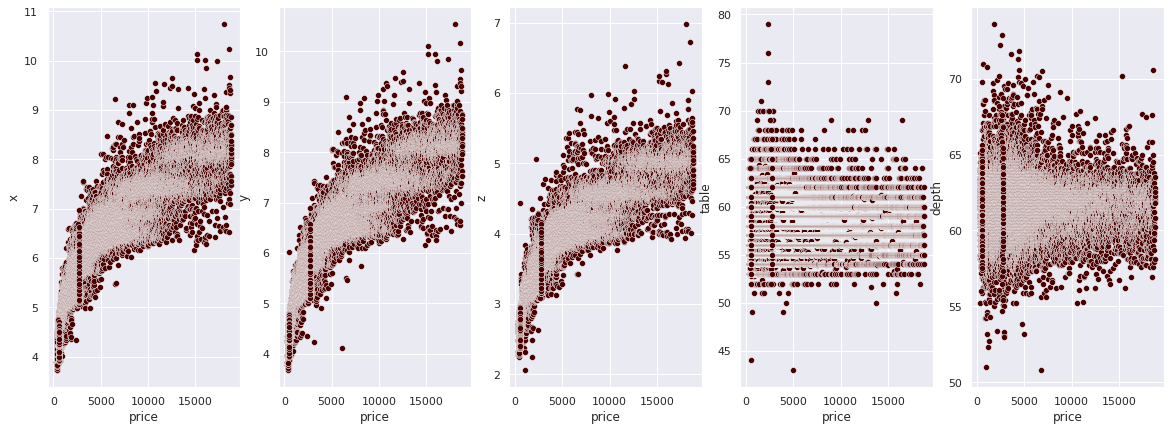

In [33]:
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = train_data, x = train_data['price'], y = train_data[i], ax = axs[c])
    c+=1

#Much cleaner, will give better results

In [34]:
X_train = train_diamonds.drop("price", axis=1)
X_train

,carat,cut,color,clarity,depth,table,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
1,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
2,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
3,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...
43035,0.72,Premium,D,SI1,62.7,59.0,5.69,5.73,3.58
43036,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
43037,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
43038,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [35]:
y_train = train_diamonds["price"]
y_train

0         326
1         334
2         335
3         336
4         336
         ... 
43035    2757
43036    2757
43037    2757
43038    2757
43039    2757
Name: price, Length: 43023, dtype: int64

In [36]:
X_test = test_data

In [37]:
num_data = X_train.drop(["cut", "color", "clarity"], axis=1)
num_attribs = list(num_data)
cat_attribs = ["clarity", "cut", "color"]

In [38]:
train_diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [39]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
    ])

In [40]:
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OrdinalEncoder(), cat_attribs)])

In [41]:
data_prepared = full_pipeline.fit_transform(X_train)
data_prepared

array([[-1.2192686 , -1.35634202,  1.58995974, ...,  2.        ,
         3.        ,  1.        ],
       [-1.05300991,  0.45565074,  0.25043155, ...,  5.        ,
         3.        ,  5.        ],
       [-1.01144523,  1.082879  ,  0.25043155, ...,  3.        ,
         1.        ,  6.        ],
       ...,
       [-0.15936941,  0.94349494, -1.08909665, ...,  2.        ,
         1.        ,  0.        ],
       [ 0.13158331, -0.52003767,  0.25043155, ...,  3.        ,
         3.        ,  4.        ],
       [-0.0970224 ,  0.31626668, -1.08909665, ...,  3.        ,
         2.        ,  0.        ]])

In [42]:
X_test

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
2,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
3,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39
4,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46
...,...,...,...,...,...,...,...,...,...,...
10895,53922,0.70,Very Good,E,VS2,62.8,60.0,5.59,5.65,3.53
10896,53923,0.70,Very Good,D,VS1,63.1,59.0,5.67,5.58,3.55
10897,53933,0.70,Very Good,E,VS2,60.5,59.0,5.71,5.76,3.47
10898,53934,0.70,Very Good,E,VS2,61.2,59.0,5.69,5.72,3.49


In [43]:
some_data = full_pipeline.transform(X_train)
test_pre = full_pipeline.transform(X_test)

In [44]:
# pre = lin_reg.predict(some_data)
# pre
# submessions = pd.DataFrame()
# submessions["price"] = pre
# submessions

In [45]:
# from sklearn.metrics import mean_squared_error
# data_prediction = lin_reg.predict(data_prepared)
# lin_mse = mean_squared_error(y_train, data_prediction)
# lin_rmse = np.sqrt(lin_mse)
# lin_rmse

In [46]:
# from sklearn.tree import DecisionTreeRegressor
# tree_reg = DecisionTreeRegressor()
# tree_reg.fit(data_prepared, y_train)

In [47]:
# pre = tree_reg.predict(some_data)
# pre

In [48]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(data_prepared, y_train)

RandomForestRegressor()

In [49]:
pre = forest_reg.predict(test_pre)
pre

array([ 407.94,  418.18,  399.1 , ..., 2854.  , 2907.85, 2678.67])

In [50]:
#from sklearn.linear_model import LogisticRegression
#lo_r = LogisticRegression()
#lo_r.fit(data_prepared, y_train)

In [51]:
submissions = test_data[["Unnamed: 0"]]

submissions["price"] = pre
submissions
submissions.to_csv("submession.csv", index=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
#from sklearn.metrics import mean_squared_error
#lin_mse = mean_squared_error(y_train, pre)
#lin_rmse = np.sqrt(lin_mse)
#lin_rmse

In [53]:
def display_scores(scores):
    print(f"scores: {scores}")
    print(f"mean: {scores.mean()}")
    print(f"std: {scores.std()}")

In [54]:
scores = cross_val_score(forest_reg, data_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_score = np.sqrt(-scores)
display_scores(rmse_score)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(forest_reg, data_prepared, y_train, scoring='neg_mean_absolute_error', cv=kfold, error_score='raise' )
kf_cv_scores= -kf_cv_scores

scores: [ 511.89711562  561.7163739   770.20154416 1231.80345191 2612.78730938
 1307.46651151  133.86794061  196.45744804  260.81200193  397.47188359]
mean: 798.4481580643637
std: 716.3496806072932


In [55]:
print("K-fold CV average score: %.2f +/- %.2f" % (kf_cv_scores.mean(), kf_cv_scores.std()))

K-fold CV average score: 274.15 +/- 5.93


**Fine-Tune**

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# param_grid = [
# {'n_estimators': [30, 100, 500], 'max_features': [2, 4, 6, 8]},
# {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
# ]
# forest_reg = RandomForestRegressor()
# grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring="neg_mean_squared_error", return_train_score=True)
# grid_search.fit(data_prepared, y_train)

In [58]:
# cvres = grid_search.cv_results_
# for mean_score, param in zip(cvres["mean_test_score"], cvres["params"]):
#   print(np.sqrt(-mean_score), param)

In [59]:
# feature_importances = grid_search.best_estimator_.feature_importances_
# feature_importances

In [60]:
# final_model = grid_search.best_estimator_

In [61]:
# final_model

In [62]:
# final_predictions = final_model.predict(some_data)
# final_mse = mean_squared_error(y_train, final_predictions)
# final_rmse = np.sqrt(final_mse)
# final_rmse

In [63]:
# final_predictions

In [64]:
from sklearn.model_selection import train_test_split
data = X_train
data['price'] = y_train
train_set, test_set = train_test_split(data, test_size=0.5, random_state=42)

In [65]:
test_set.drop(index=461, axis=0, inplace=True)

In [66]:
xtr, ytr = train_set.drop("price", axis=1), train_set["price"]
xts, yts = test_set.drop("price", axis=1), train_set["price"]

In [ ]:
from lazypredict.Supervised import LazyRegressor
xtr = full_pipeline.fit_transform(xtr)
xts = full_pipeline.fit_transform(xts)
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(xtr, xts, ytr, yts)

 21%|██▏       | 9/42 [00:07<00:33,  1.02s/it]